In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('./Datasets/city_day.csv')

In [131]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [132]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [134]:
categorical_variables = ['Date','City','AQI_Bucket']
columns = [column for column in df.columns if column not in categorical_variables]

In [135]:
columns

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

In [136]:
df[columns] = df[columns].fillna(value=df[columns].mean())

In [137]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [138]:
df['Date'] = pd.to_datetime(df['Date'])

In [139]:
df.set_index('Date',inplace=True)

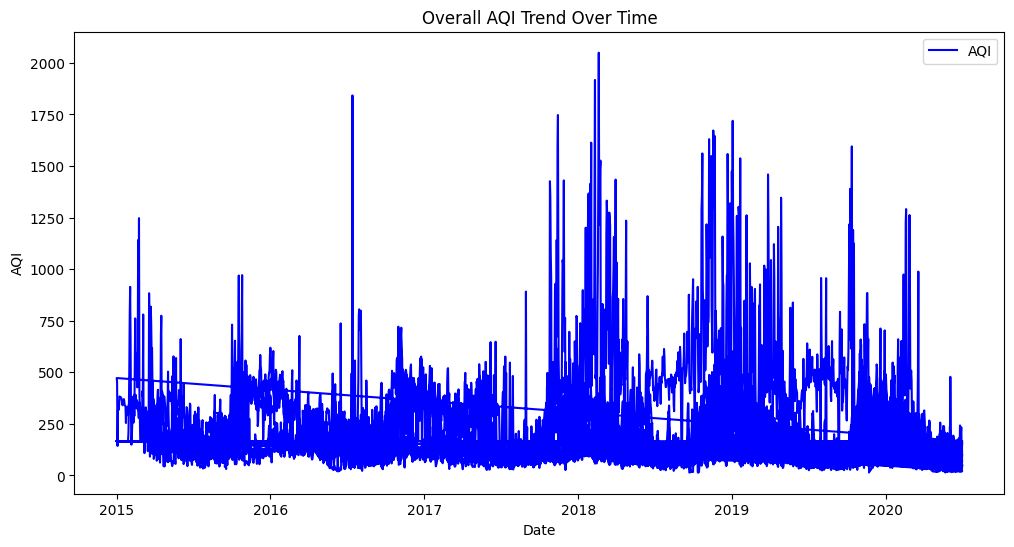

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='blue')
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

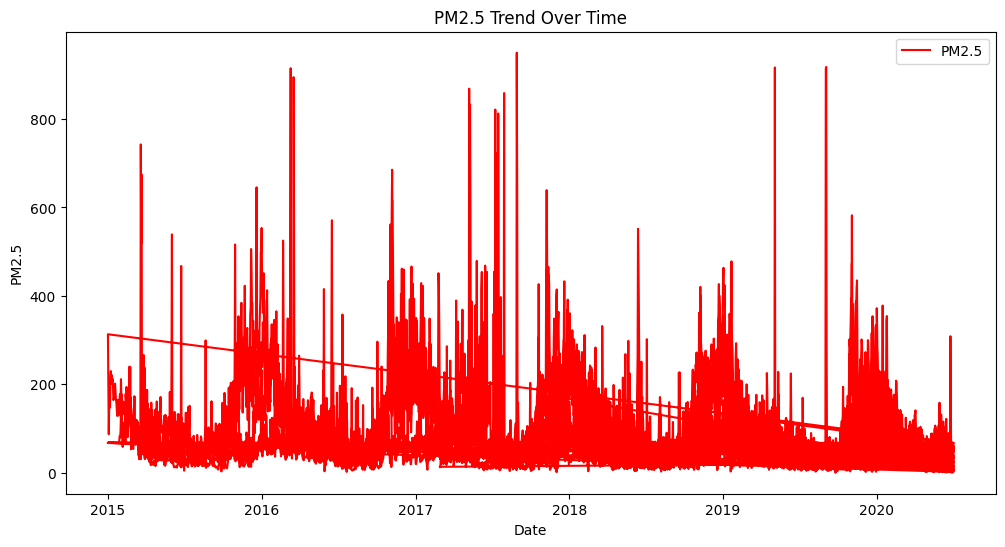

In [141]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5', color='red')
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

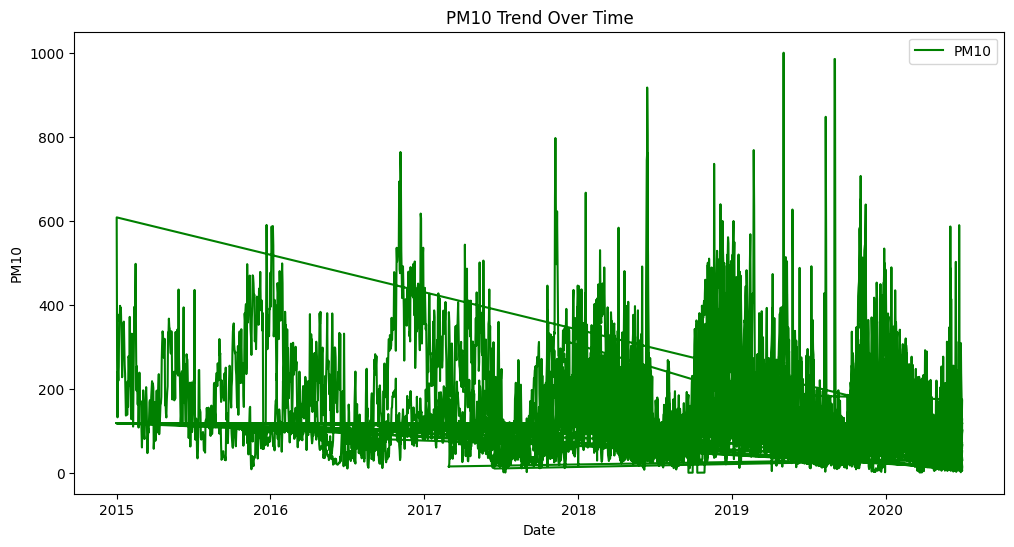

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM10'], label='PM10', color='green')
plt.title('PM10 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()

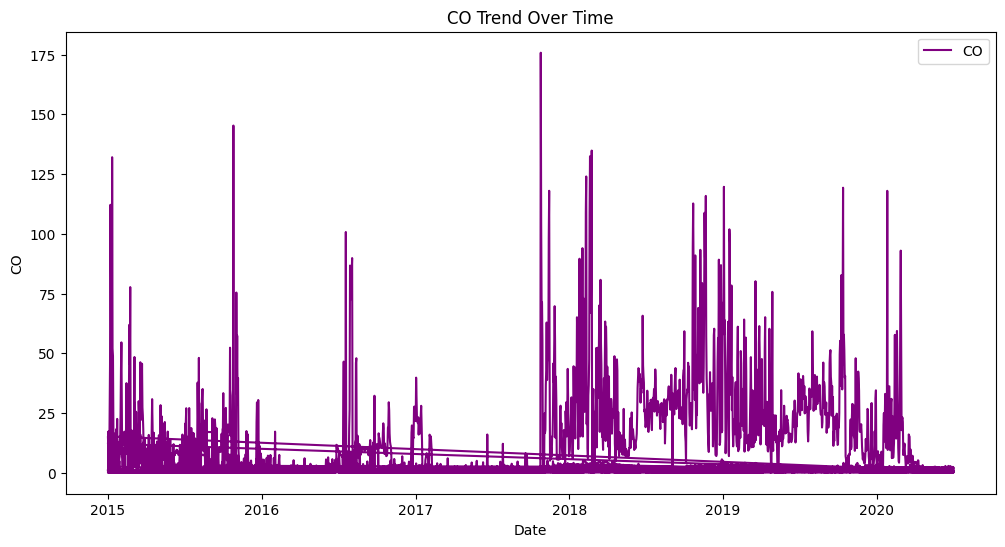

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CO'], label='CO', color='purple')
plt.title('CO Trend Over Time')
plt.xlabel('Date')
plt.ylabel('CO')
plt.legend()
plt.show()

In [144]:
monthly_aqi = df['AQI'].resample('M').mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25916\1562208318.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df['AQI'].resample('M').mean()


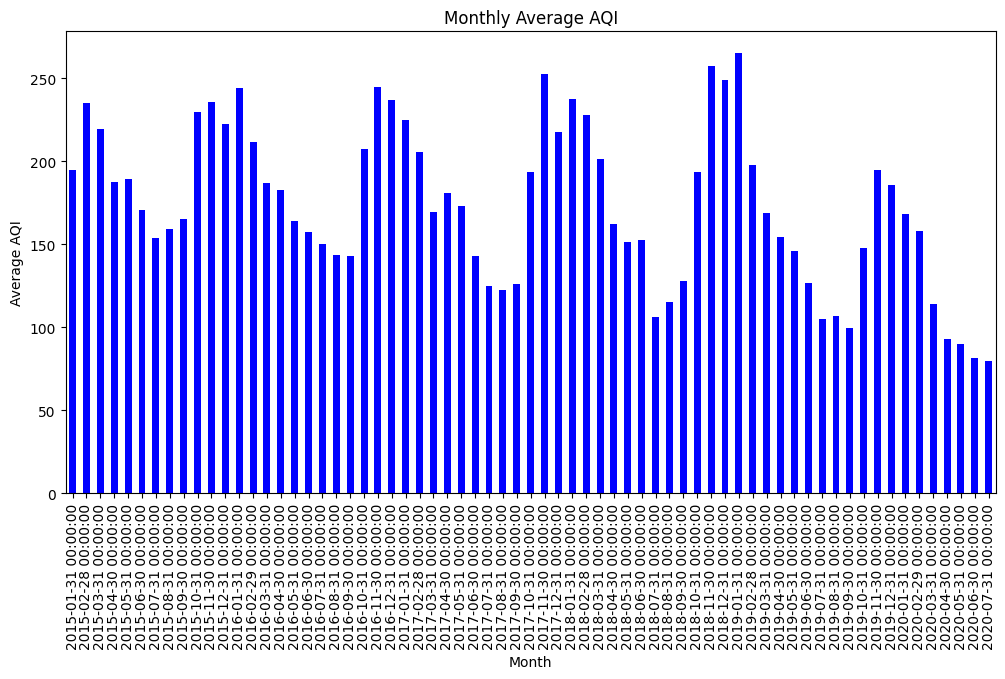

In [145]:
plt.figure(figsize=(12, 6))
monthly_aqi.plot(kind='bar', color='blue')
plt.title('Monthly Average AQI')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

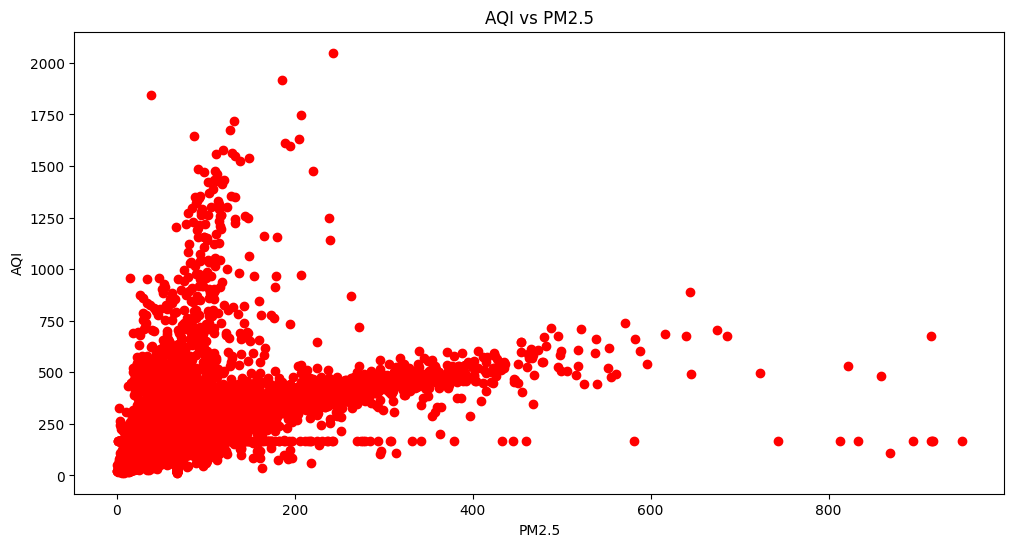

In [146]:
plt.figure(figsize=(12, 6))
plt.scatter(df['PM2.5'], df['AQI'], color='red')
plt.title('AQI vs PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

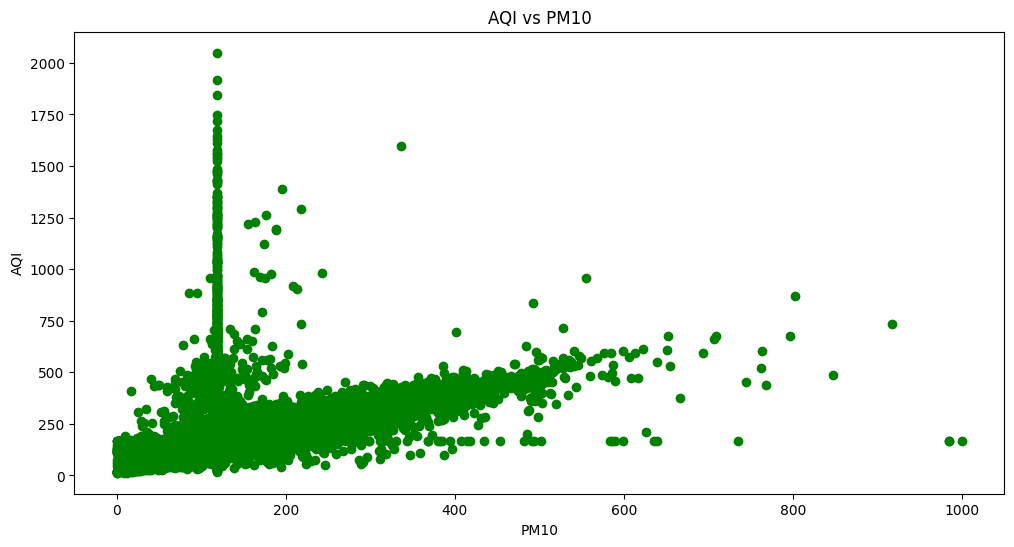

In [147]:
plt.figure(figsize=(12, 6))
plt.scatter(df['PM10'], df['AQI'], color='green')
plt.title('AQI vs PM10')
plt.xlabel('PM10')
plt.ylabel('AQI')
plt.show()

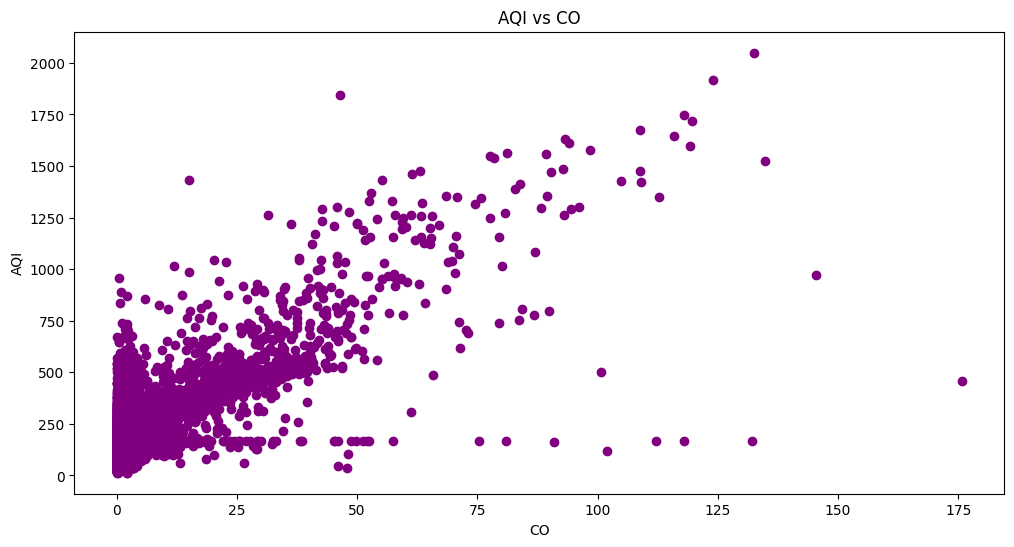

In [148]:
plt.figure(figsize=(12, 6))
plt.scatter(df['CO'], df['AQI'], color='purple')
plt.title('AQI vs CO')
plt.xlabel('CO')
plt.ylabel('AQI')
plt.show()

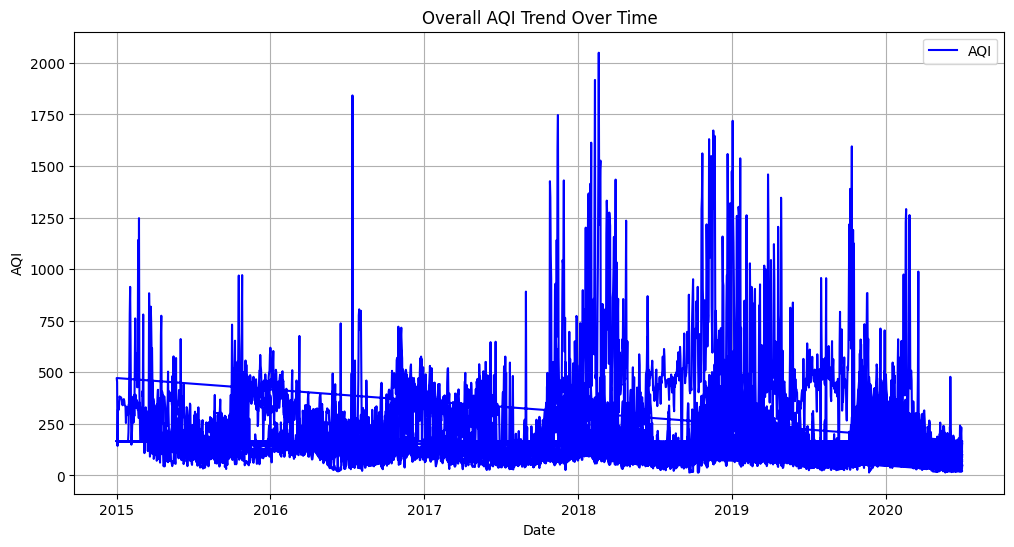

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='blue')
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

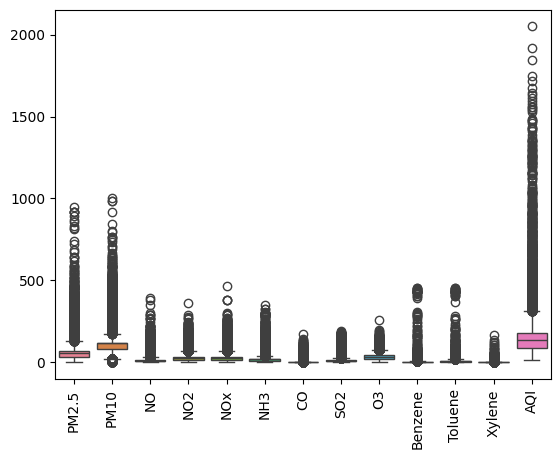

In [150]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [151]:
cols = df.columns
cols = cols.drop(['City','AQI_Bucket'])
cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [153]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
for col in cols:
    df = df[(df[col] >= lower[col]) & (df[col] <= upper[col])]

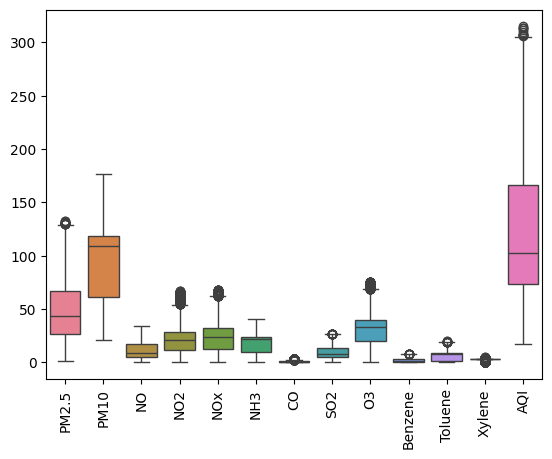

In [154]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [167]:
def plot_time_series(col='SO2'):
    fig,ax = plt.subplots(2,1,figsize=(20,12))
    ind = df[[col,'City']].groupby('City',as_index=False).median().sort_values(by=col,ascending=False)
    top = ind[:10]
    sns.lineplot(x='City',y=col,data = top,ax = ax[0],marker ='o',color='red')
    ax[0].set_title('Top 10 cities by {}'.format(col))
    ax[0].set_ylabel('{}'.format(col))
    ax[0].set_xlabel('City')
    ax[0].set_xticklabels(top['City'],rotation=45)

    bottom = ind[-10:]
    sns.lineplot(x='City',y=col,data = bottom,ax = ax[1],marker ='o',color='red')
    ax[1].set_title('Bottom 10 cities by {}'.format(col))
    ax[1].set_ylabel('{}'.format(col))
    ax[1].set_xlabel('City')
    ax[1].set_xticklabels(top['City'],rotation=45)

    plt.tight_layout()
    plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_25916\3455191347.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top['City'],rotation=45)
C:\Users\Dell\AppData\Local\Temp\ipykernel_25916\3455191347.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top['City'],rotation=45)


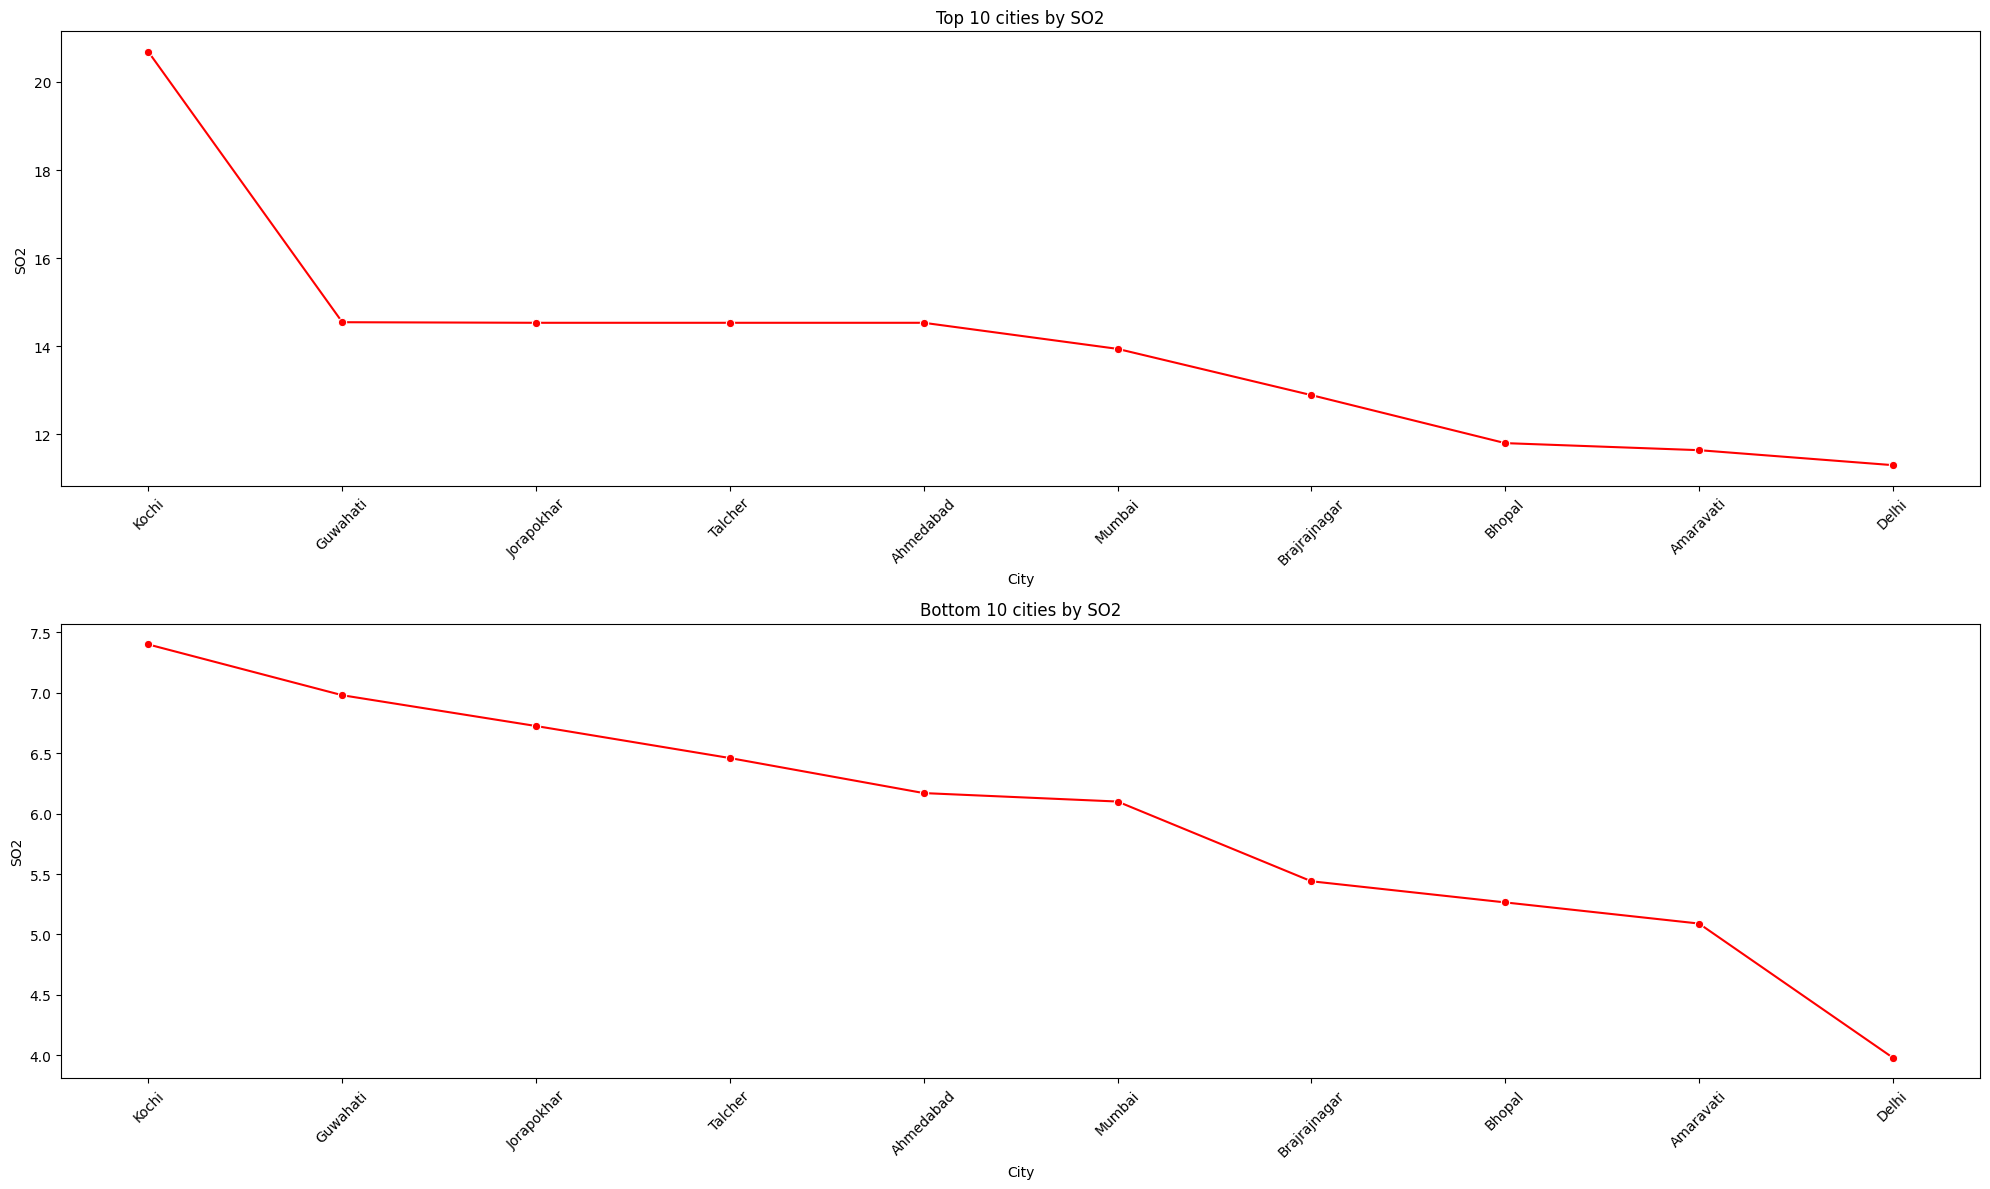

C:\Users\Dell\AppData\Local\Temp\ipykernel_25916\3455191347.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top['City'],rotation=45)
C:\Users\Dell\AppData\Local\Temp\ipykernel_25916\3455191347.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top['City'],rotation=45)


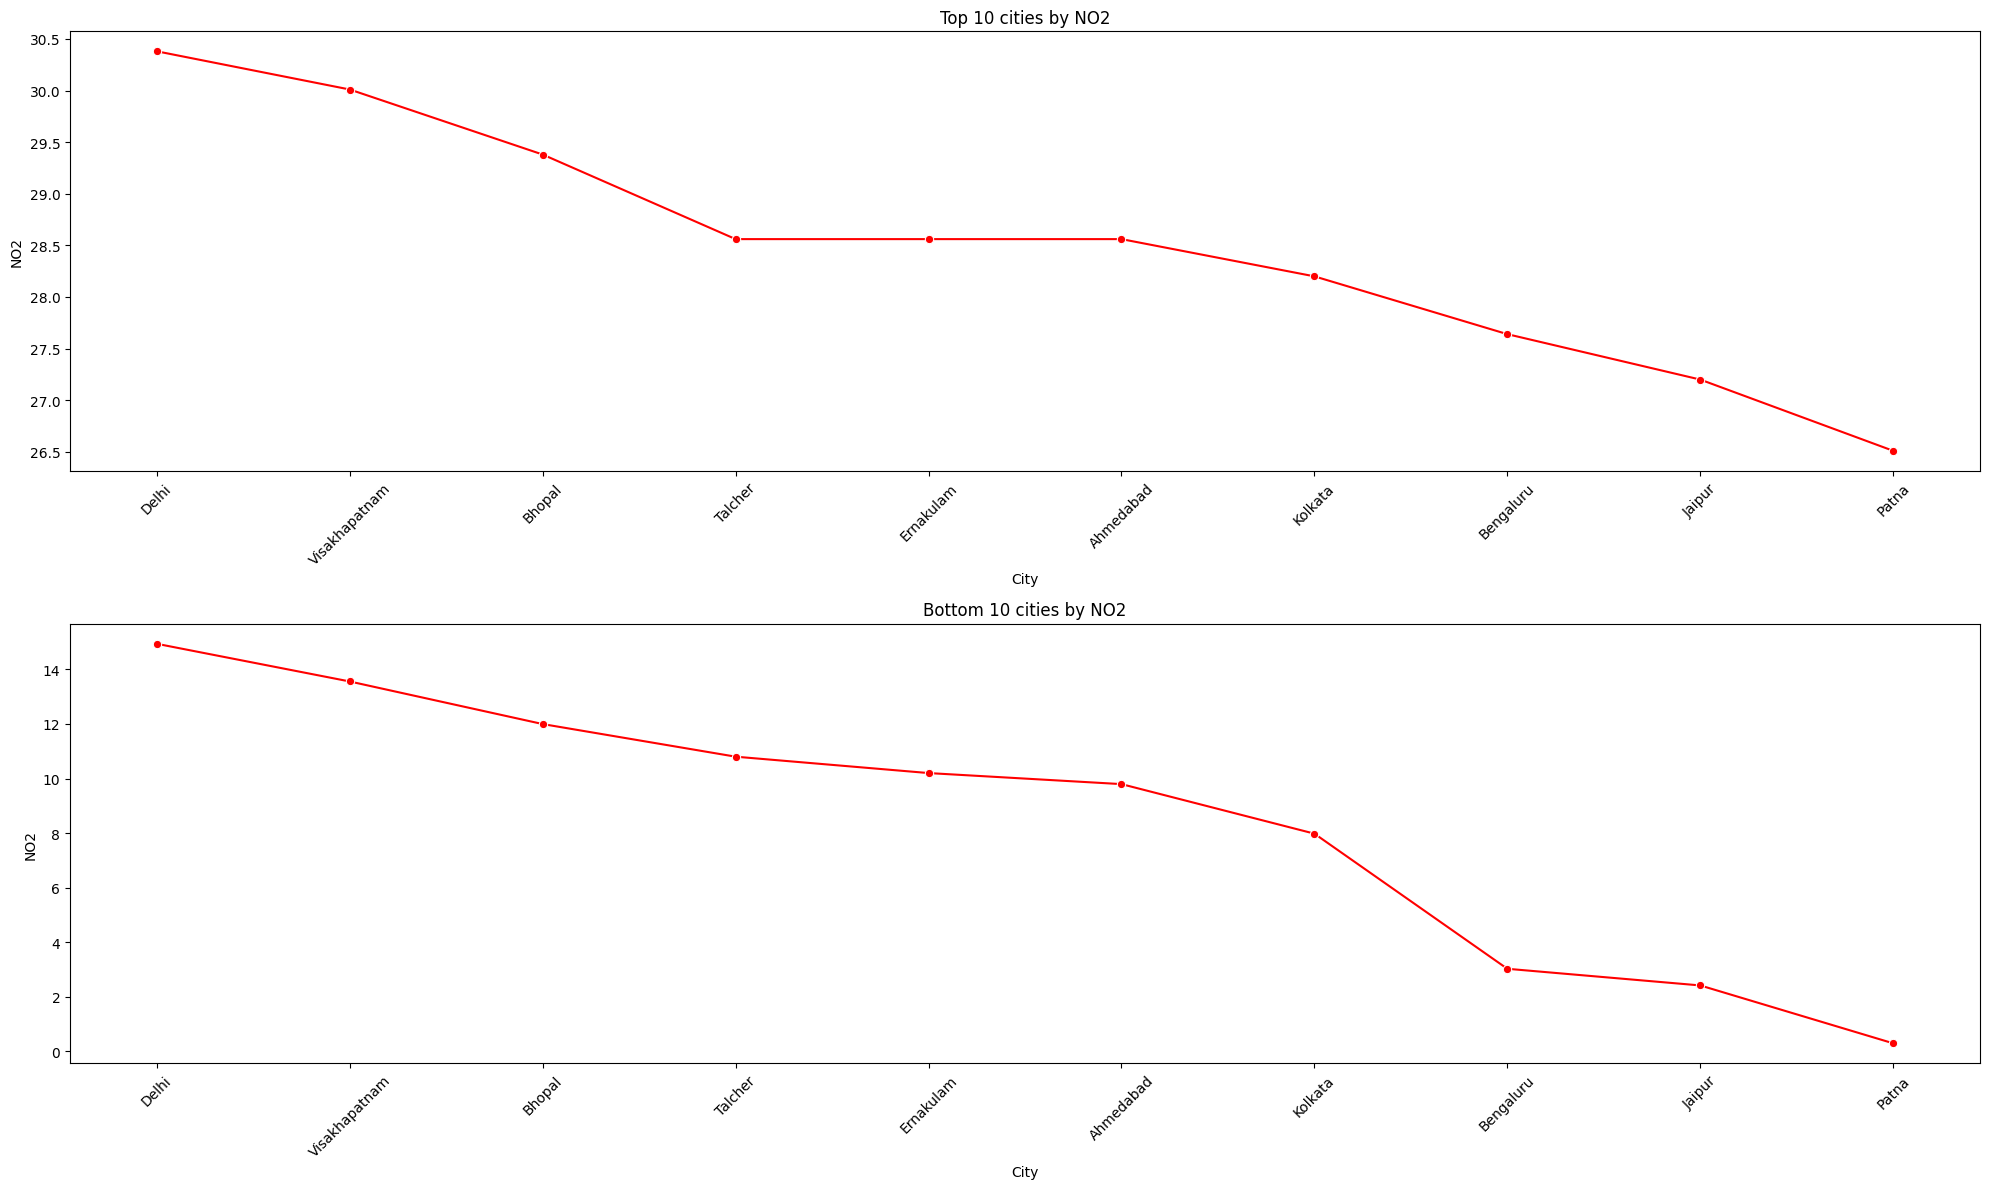

In [168]:
plot_time_series("SO2")
plot_time_series("NO2")

In [169]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

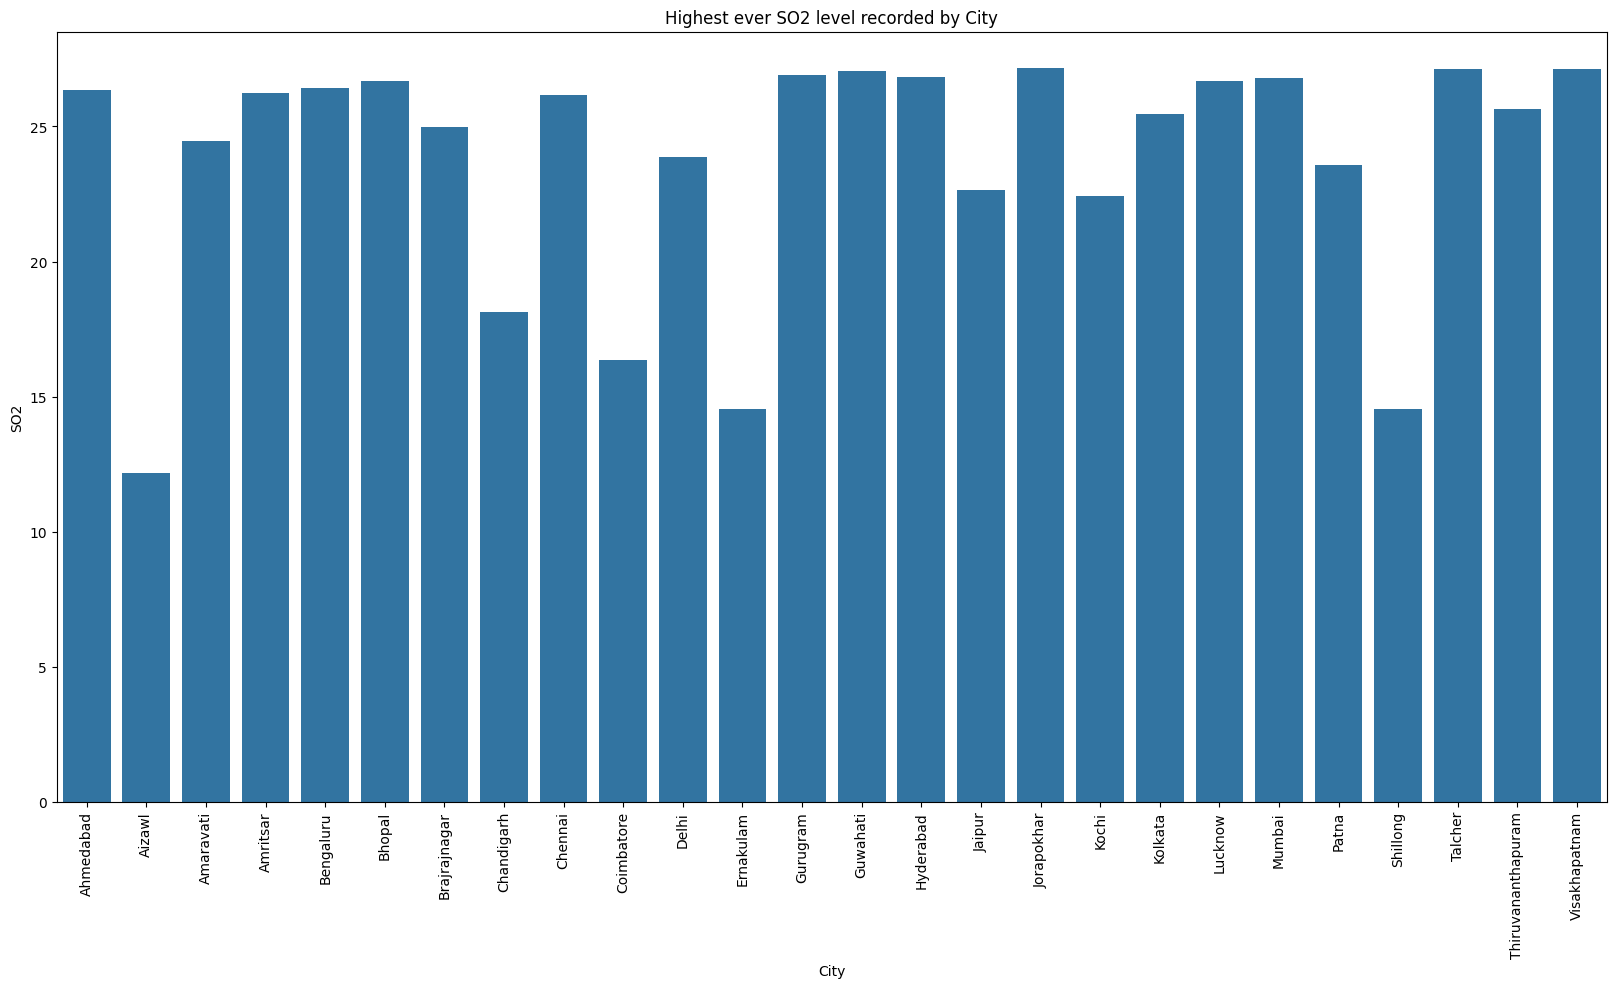

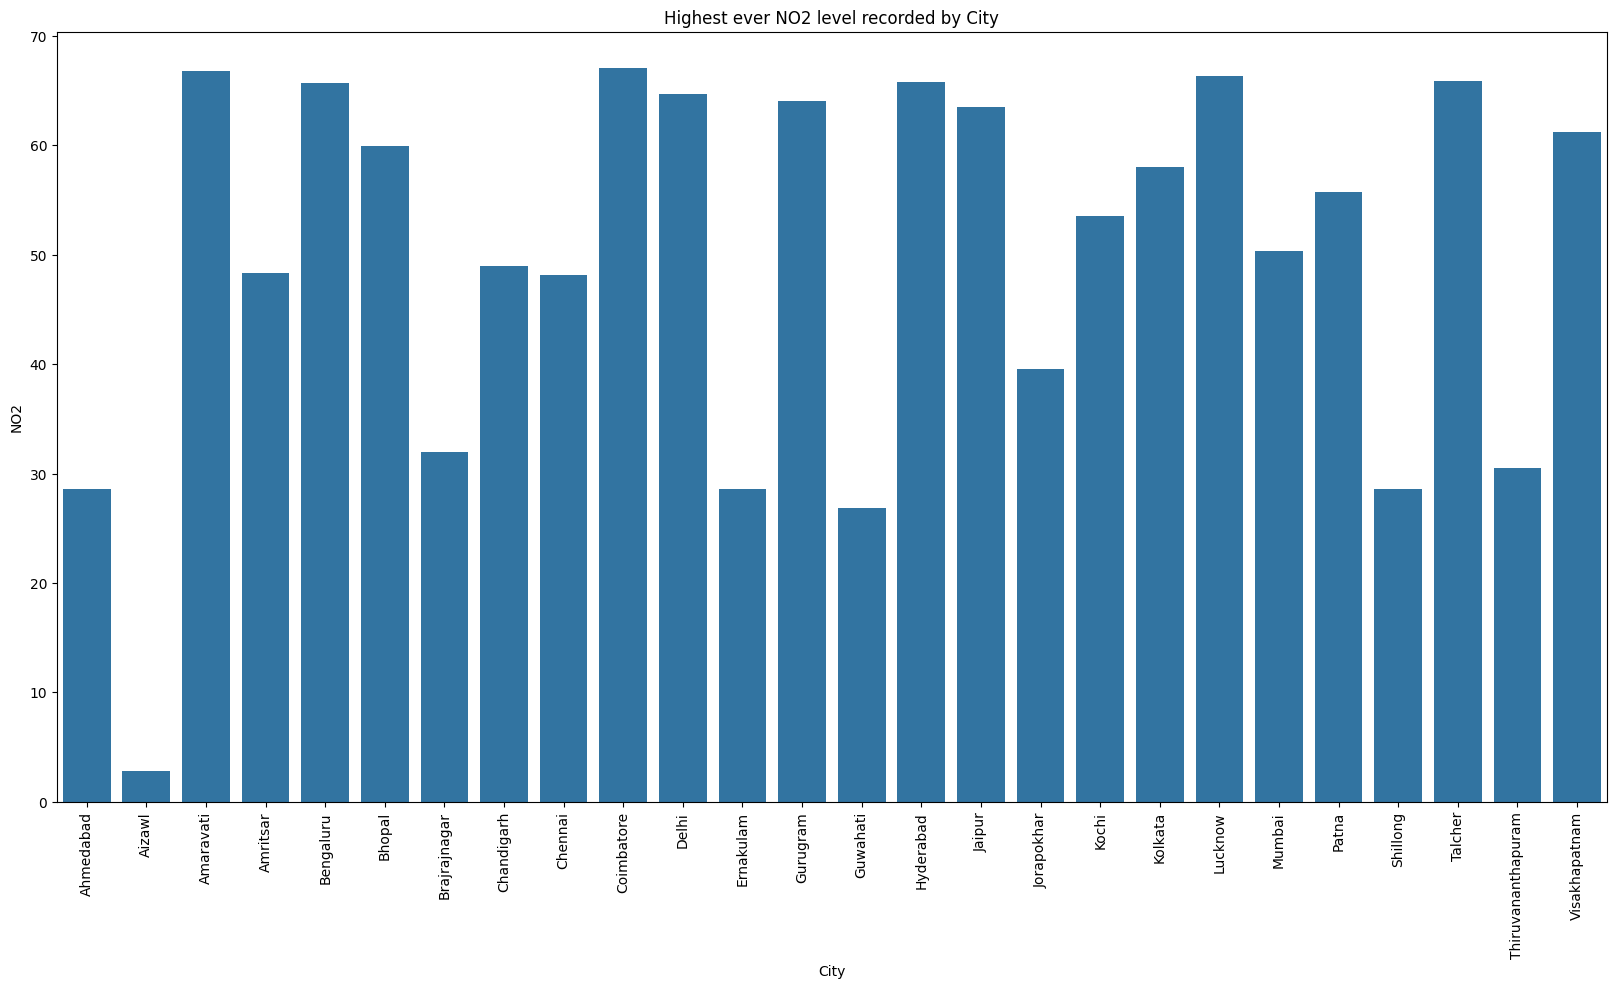

In [171]:
def highest_levels(col="SO2"):
    plt.figure(figsize=(20,10))
    ind = df[[col,'City']].groupby('City',as_index=False).max()
    highest = sns.barplot(x='City',y=col,data=ind)
    highest.set_title('Highest ever {} level recorded by City'.format(col))
    plt.xticks(rotation=90)
highest_levels()
highest_levels("NO2")